# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](https://webcache.googleusercontent.com/search?q=cache:stAVPik6onEJ:yann.lecun.com/exdb/mnist) and include:

88% [Lecun et al., 1998](https://hal.science/hal-03926082/document)

95.3% [Lecun et al., 1998](https://hal.science/hal-03926082v1/document)

99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)


MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Installation

In [1]:
# Update the PATH to include the user installation directory. 
import os
os.environ['PATH'] = f"{os.environ['PATH']}:/root/.local/bin"

# Restart the Kernel before you move on to the next step.

#### Important: Restart the Kernel before you move on to the next step.

In [2]:
# Install requirements
!python -m pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 37.1 MB 1.0 MB/s eta 0:00:01
     |████████████████████████████████| 19.3 MB 74.9 MB/s eta 0:00:01
     |████████████████████████████████| 21.0 MB 58.6 MB/s eta 0:00:01
     |████████████████████████████████| 76 kB 138 kB/s  eta 0:00:01
     |████████████████████████████████| 123 kB 55.7 MB/s eta 0:00:01
     |████████████████████████████████| 297 kB 49.5 MB/s eta 0:00:01
     |████████████████████████████████| 11.3 MB 41.3 MB/s eta 0:00:01
     |████████████████████████████████| 292 kB 24.1 MB/s eta 0:00:01
     |████████████████████████████████| 109 kB 74.0 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 71.2 MB/s eta 0:00:01
     |████████████████████████████████| 215 kB 55.2 MB/s eta 0:00:01
     |████████████████████████████████| 98 kB 2.8 MB/s eta 0:00:01
     |████████████████████████████████| 121 kB 76.9 MB/s eta 0:00:01
     |███████████████████

## Imports

In [1]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter
import torchvision
from torchvision import transforms
import torchvision.transforms as transforms
from torchvision import datasets
import matplotlib.pyplot as plt
import numpy as np

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [3]:
## Define transforms##
## YOUR CODE HERE ##

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,),(0.5))])


# Create training set and define training dataloader##
## YOUR CODE HERE ##

training_data = torchvision.datasets.MNIST(root="data",train=True, download=True, transform=transform)


# Create test set and define test dataloader##
## YOUR CODE HERE ##

test_data = torchvision.datasets.MNIST(root="data", train=False, download=True, transform=transform)

train_loader = DataLoader(training_data, batch_size=16, shuffle=True)
test_loader = DataLoader(test_data, batch_size=16, )




/opt/conda/lib/python3.7/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:178.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

**DOUBLE CLICK THIS CELL TO MODIFY**

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [4]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

Index: 0
Size: torch.Size([28, 28])
Type image: <class 'torch.Tensor'>
train size: 60000
test size: 10000
Label: 2
1


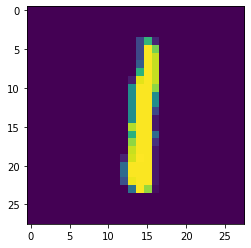

8


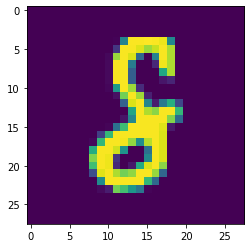

7


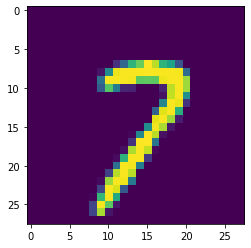

3


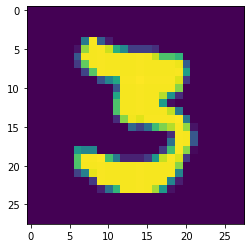

4


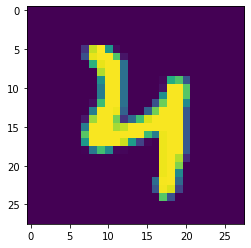

In [5]:
# Explore data
## YOUR CODE HERE ##

#In this cell, we want to explore the dimensions of data, train size, test size and, using show5 to view examples 

train_features, train_labels = next(iter(train_loader))   

img = train_features[0].squeeze()
label = train_labels[0]

print('Index:', 0)
print(f"Size: {img.size()}")
print(f"Type image: {type(img)}")
print(f"train size: {len(training_data)}")
print(f"test size: {len(test_data)}")
print(f"Label: {label}")
show5(train_loader)


## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [13]:
# YOUR CODE HERE ##
## Construct a neural network ##

## Start by defining the training loop ##

def train_model(net, optimizer, criterion, train_loader, test_loader, num_epochs=8):
    
    best_val_loss = float("inf")
    thresh = 0.001
    below_threshold = 0
    patience = 2
    
    for epoch in range(nem_epochs):
        net.train()
        train_loss = 0.0
        train_correct = 0
        for i, data in enumerate(train_loader):
            inputs, labels = data
            
            optimizer.zero_grad()
            
            outputs = net(inputs)
            loss = criterion(ouputs, labels)
            loss.backward()
            optimizer.step()
            
            _, preds = torch.max(outputs.data, 1)
            train_correct += (preds ==labels).sum().item()
            train_loss += loss.item()
            print(f'Epoch {epoch + 1} training accuracy: {train_correct/len(train_loader):.2f}% training loss:{train_loss/len}')  

## Validation 
    net.eval()
    val_loss = 0.0
    val_correct = 0
    for inputs, labels in test_loader:
        if torch.cuda.is_available():
            inputs, labels = inputs.cuda(), labels.cuda()
        
            outputs = nets(inputs)
            loss = criterion(outputs, labels)
                  
            _, preds = torch.max(outputs.data, 1)
            val_correct += (preds == labels).sum().item()
                  
            #Update the validation loss with the loss for the batch
            val_loss += loss.item()
            
            writer.add_scalar("Loss/val", val_loss/len(test_loader), epoch)
            writer.add_scalar("Accuracy/val", val_correct/len(test_loader), epoch)
                  
            print(f'Epoch {epoch + 1}) validation accuracy: {val_correct/len(test_loader):.2f}% validation loss: {val_loss/len}')
                  
            
            
            ##Calculate the difference between the best validation loss and validation loss
                  
            diff = best_val_loss - loss
                  
            ##Set the best validation loss to the current validation loss if it is smaller
                  
            if best_val_loss > val_loss:
                best_val_loss = val_loss
                
                              
            ##Check if the difference between the best validation loss and the current validation loss isunder threshold
                  
            if diff <= thresh:
                  
            ## Increase count below threshold
             ## Check if the number below threshold is greater than our patience stop training
                  below_threshold += 1
                  if below_threshold >= patience:
                    break
                    
                    
                               
                   
               
            
            

Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [14]:
## YOUR CODE HERE ##
def train_model(net, num_epochs=16, learning_rate=0.01):
    
    ## Define optimizer and loss
    
    optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)
    criterion = nn.CrossEntropyLoss
    
    # Iterate based on the number of epochs
    for epoch in range(num_epochs):
        net.train()
        train_loss = 0.0
        train_correct = 0
        
        ## Loop  over the data in the training data loader in a batch
        
        for i, data in enumerate(train_loader):
            inputs, labels = data
            
            if torch.cuda.is_available():
                imputs, labels = imputs.cuda(), labels.cuda()
                
                ## Zero out the gradient of the optimizer
                optimizer.zero_grad()
                
                ## Get the output logits
                outputs = net(inputs)
                
                ## Compute the cross entropy loss between the outputs and the labels
                loss = criterion(outputs, labels)
                
                ## Compute the gradient of loss with respect to the parameters
                loss.backward()
                
                ## Update the parameters
                optimizer.step()
                
                ## Get the preditions from the outputs
                _, preds = torch.max(outputs.data, 1)
                train_correct += (preds == labels).sum.item()
                train_loss += loss.item()
                
                writer.add_scalar("Loss/train", train_loss/len(train_loader), epoch)
                writer.add_scalar("Accuracy/train", train_correct/len(train_loader), epoch)
                                
                ## Print the running accuracy
                print (f'Epoch {epoch + 1} training accuracy: {train_correct/len(train_loader):.2f}% training loss:{train_loss/len}')
                
                return net
 

    ## Instantiate the model
    class Net(nn.module):
        def __init__(self):
            super()*__init__()
            self.conv1 = nn.Conv2d(1, 6, 5)
            self.pooi = nn.MaxPool2d(2, 2)
            self.conv2 = nn.Conv2d(6, 16, 5)
            self.fc1 = nn.Lnear(16 * 4 *4, 120)
            self.fc2 = nn.Linear(120, 84)
            self.fc3 = nn.Linear(84, 10)
            
        def forward(self, x):
            x = self.pool(F.relu(self.conv1(x)))
            x = self.pool(F.relu(self.conv2(x)))
            x = torch.flatten(x,1)
            x = F.relu(self.fc1(x))
            x = F.relu(self.fc2(x))
            x = self.fc3(x)
            return x
        
        
        ## Instantiate the train_model
        
        net = Net()
        
        net.to(device)

        
        
        train_model(net)
        


             
                
    

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [15]:
## YOUR CODE HERE ##

num_epochs = 16

# Establish a list for our history
train_loss_history = list()
val_loss_history = list()

for epoch in range(num_epochs):
    net.train()
    train_loss = 0.0
    train_correct = 0
    for i, data in enumerate(train_loader):
        # data is a list of [inputs, labels]
        inputs, labels = data

        # Pass to GPU if available.
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs.data, 1)
        train_correct += (preds == labels).mean().item()
        train_loss += loss.item()
    print(f'Epoch {epoch + 1} training accuracy: {train_correct/len(train_loader):.2f}% training loss: {train_loss/len(train_loader):.5f}')
    train_loss_history.append(train_loss/len(train_loader))


    val_loss = 0.0
    val_correct = 0
    net.eval()
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = net(inputs)
        loss = criterion(outputs, labels)

        _, preds = torch.max(outputs.data, 1)
        val_correct += (preds == labels).mean().item()
        val_loss += loss.item()
    print(f'Epoch {epoch + 1} validation accuracy: {val_correct/len(test_loader):.2f}% validation loss: {val_loss/len(test_loader):.5f}')
    val_loss_history.append(val_loss/len(test_loader))

NameError: name 'net' is not defined

Plot the training loss (and validation loss/accuracy, if recorded).

In [16]:
## YOUR CODE HERE ##

# Plot the training and validation loss history
plt.plot(train_correct, label="Training Loss")
plt.plot(train_loss, label="Validation Loss")
plt.legend()
plt.show()

NameError: name 'train_correct' is not defined

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [9]:
## YOUR CODE HERE ##
## Here we test the model

net.eval()
val_loss = 0.0
val_correct = 0
for inputs, labels in test_loader:
        if torch.cuda.is_available():
            inputs, labels = inputs.cuda(), labels.cuda()
        
            outputs = nets(inputs)
            loss = criterion(outputs, labels)
                  
            _, preds = torch.max(outputs.data, 1)
            val_correct += (preds == labels).sum().item()
                  
            #Update the validation loss with the loss for the batch
            val_loss += loss.item()
            
            writer.add_scalar("Loss/val", val_loss/len(test_loader), epoch)
            writer.add_scalar("Accuracy/val", val_correct/len(test_loader), epoch)
                  
            print(f'Epoch {epoch + 1}) validation accuracy: {val_correct/len(test_loader):.2f}% validation loss: {val_loss/len}')
              


                

NameError: name 'net' is not defined

## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [12]:
## YOUR CODE HERE ##

## Saving your model
Using `torch.save`, save your model for future loading.

In [31]:
## YOUR CODE HERE ##
